# DFA and Factor Investing

# 2. The Factors
DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a size and value factor. Note that these three factors are already listed as excess returns.

### Data

Use the data found in data/dfa_analysis_data.xlsx.

- Monthly excess return data for the overall equity market, 

- The sheet also contains data on two additional factors, SMB and HML, as well as the risk-free rate.

- You do not need any of these columns for the homework. Just use the MKT column, which is excess market returns. (So no need to subtract the risk-free rate.)

## 1.
Calculate their univariate performance statistics:

- mean

- volatility

- Sharpe

- VaR(.05)

Report these for the following three subsamples:

- Beginning - 1980

- 1981 - 2001

- 2002 - End

In [4]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# load the data
file_path = "data/dfa_analysis_data.xlsx"

data = pd.read_excel(file_path, sheet_name=None)

In [7]:
# process the factors data for MKT, SMB, HML
factors = data["factors"]
factors["Date"] = pd.to_datetime(factors["Date"])
factors = factors.rename(columns={"Mkt-RF": "MKT"})
factors = factors[["Date", "MKT", "SMB", "HML"]].set_index("Date").sort_index()
factors

,MKT,SMB,HML
Date,,,
1926-07-31,0.0289,-0.0255,-0.0239
1926-08-31,0.0264,-0.0114,0.0381
1926-09-30,0.0038,-0.0136,0.0005
1926-10-31,-0.0327,-0.0014,0.0082
1926-11-30,0.0254,-0.0011,-0.0061
...,...,...,...
2025-04-30,-0.0084,-0.0059,-0.0340
2025-05-31,0.0606,0.0070,-0.0288
2025-06-30,0.0486,0.0083,-0.0160


In [8]:
# create subsamples for analysis
subsamples = {
    "Beginning - 1980": factors.loc[: "1980-12-31"],
    "1981 - 2001": factors.loc["1981-01-01":"2001-12-31"],
    "2002 - End": factors.loc["2002-01-01":],
}

In [9]:
# function to compute summary statistics for mean, volatility, sharpe ratio, VaR(0.05)
def summary(series):
    mean = series.mean()
    vol = series.std()
    sharpe = mean / vol
    var_05 = np.quantile(series, 0.05)
    return pd.Series({
        "Mean": mean,
        "Volatility": vol,
        "Sharpe": sharpe,
        "VaR(0.05)": var_05
    })

In [10]:
# compute and display results for each subsample
results = {}
for label, sub in subsamples.items():
    results[label] = sub.apply(summary, axis=0)

results_df = pd.concat(results, axis=0)
results_df.index.names = ["Subsample", "Statistic"]

print("Factor Performance Statistics by Subsample\n")
print(results_df.round(6))

Factor Performance Statistics by Subsample

                                  MKT       SMB       HML
Subsample        Statistic                               
Beginning - 1980 Mean        0.006746  0.002826  0.004193
                 Volatility  0.059175  0.032989  0.038748
                 Sharpe      0.114009  0.085670  0.108222
                 VaR(0.05)  -0.084090 -0.041875 -0.044245
1981 - 2001      Mean        0.006488 -0.000168  0.005380
                 Volatility  0.045375  0.033850  0.031715
                 Sharpe      0.142980 -0.004959  0.169629
                 VaR(0.05)  -0.064135 -0.045880 -0.041640
2002 - End       Mean        0.007609  0.000661  0.000100
                 Volatility  0.044320  0.025533  0.030727
                 Sharpe      0.171678  0.025885  0.003266
                 VaR(0.05)  -0.077265 -0.039195 -0.041485


## 2.
Based on the factor statistics above, answer the following.

#### Does each factor have a premium (positive expected excess return) in each subsample?
- For MKT (Market), there is a positive Mean excess returns in each subsample and improving Sharpe ratio, hence a premium.

- For SMB (Size), there is positive Mean until 1980 (premium) which goes below zero after and again goes up.

- For HML (Value), there is a strong positive Mean before the 2000s (premium), which goes down closer to zero.
#### Does the premium to the size factor get smaller after 1980?
- The premium does get smaller after 1980, as the Mean goes below zero.

#### Does the premium to the value factor get smaller during the 1990’s?
- The premium does get smaller which contributes to the decrease in value in the next period from 2000s onwards.

#### How have the factors performed since the time of the case, (2002-present)?
- All the factors have a positive Mean, but MKT has a significantly positive Mean.
Market Risk is still being compensated whereas Size and Value premiums have faded.

## 3.
The factors are constructed in such a way as to reduce correlation between them.

Report the correlation matrix across the three factors.

Does the construction method succeed in keeping correlations small?

Does it achieve this in each subsample?

In [11]:
# compute and display correlation matrices for each subsample
corr_full = factors.corr()
print("Full Sample Correlation Matrix:")
print(corr_full, "\n")

Full Sample Correlation Matrix:
          MKT       SMB       HML
MKT  1.000000  0.320443  0.227832
SMB  0.320443  1.000000  0.125828
HML  0.227832  0.125828  1.000000 



In [12]:
# compute correlations for each subsample
sub_corrs = {
    "Beginning - 1980": factors.loc[: "1980-12-31"].corr(),
    "1981 - 2001": factors.loc["1981-01-01":"2001-12-31"].corr(),
    "2002 - End": factors.loc["2002-01-01":].corr(),
}

In [13]:
# display subsample correlation matrices
print("Subsample Correlation Matrices:\n")
for label, matrix in sub_corrs.items():
    print(f"--- {label} ---")
    print(matrix, "\n")

Subsample Correlation Matrices:

--- Beginning - 1980 ---
          MKT       SMB       HML
MKT  1.000000  0.374234  0.442341
SMB  0.374234  1.000000  0.313397
HML  0.442341  0.313397  1.000000 

--- 1981 - 2001 ---
          MKT       SMB       HML
MKT  1.000000  0.158652 -0.529912
SMB  0.158652  1.000000 -0.445451
HML -0.529912 -0.445451  1.000000 

--- 2002 - End ---
          MKT       SMB       HML
MKT  1.000000  0.316034  0.109671
SMB  0.316034  1.000000  0.116227
HML  0.109671  0.116227  1.000000 



- The construction method succeeded in keeping correlations small.

- In the early subsample, the factors weren't well separated yet. But in the later subsamples the correlations are low and captured the factors distinct risks.

## 4.
Plot the cumulative returns of the three factors.

Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

In [14]:
# create subsamples
factors_sub1 = factors.loc["1981-01-01":"2001-12-31"]
factors_sub2 = factors.loc["2002-01-01":]

In [15]:
# compute cumulative returns (monthly compounding)
cum_sub1 = (1 + factors_sub1).cumprod() - 1
cum_sub2 = (1 + factors_sub2).cumprod() - 1

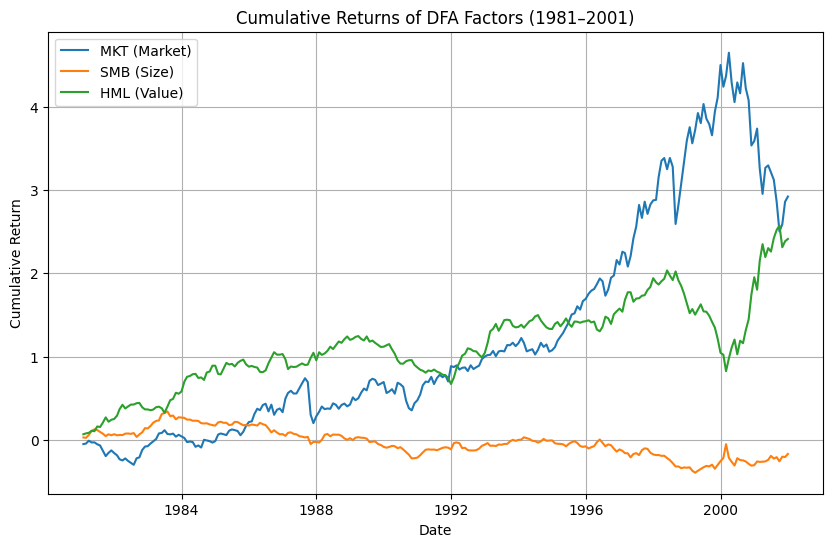

In [16]:
# Plot for 1981–2001
plt.figure(figsize=(10,6))
plt.plot(cum_sub1.index, cum_sub1["MKT"], label="MKT (Market)")
plt.plot(cum_sub1.index, cum_sub1["SMB"], label="SMB (Size)")
plt.plot(cum_sub1.index, cum_sub1["HML"], label="HML (Value)")
plt.title("Cumulative Returns of DFA Factors (1981–2001)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

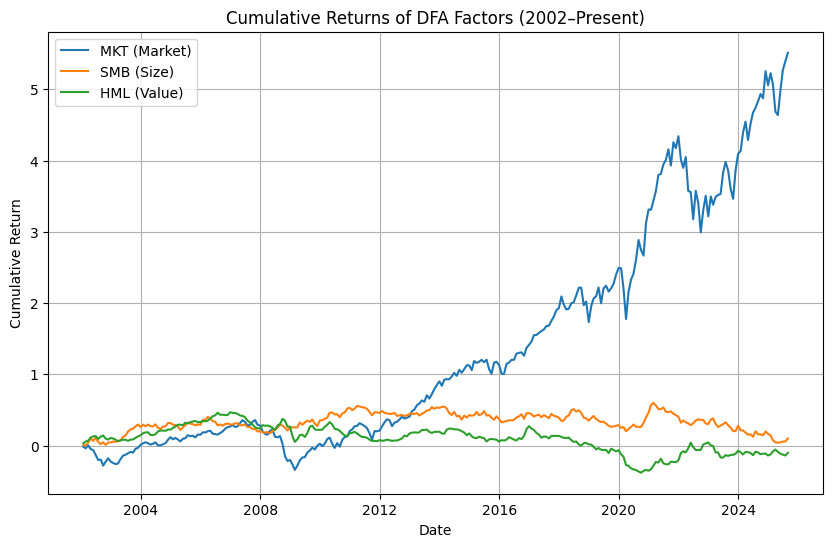

In [17]:
# Plot for 2002–Present
plt.figure(figsize=(10,6))
plt.plot(cum_sub2.index, cum_sub2["MKT"], label="MKT (Market)")
plt.plot(cum_sub2.index, cum_sub2["SMB"], label="SMB (Size)")
plt.plot(cum_sub2.index, cum_sub2["HML"], label="HML (Value)")
plt.title("Cumulative Returns of DFA Factors (2002–Present)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

## 5.
Does it appear that all three factors were valuable in 1981-2001?

And post-2001?

Would you advise DFA to continue emphasizing all three factors?

- From 1981-2001, the three factors contributed meaningful information. MKT and HML had an upwards trend whereas SMB remained relatively flat.
- Post 2001, MKT still had a positive upward trend whereas SMB and HML had stagnant trends.
- DFA can continue emphasizing MKT but should be cautious of SMB and HML

# 3. CAPM
DFA believes that premia in stocks and stock portfolios is related to the three factors.

Let’s test 25 equity portfolios that span a wide range of size and value measures.



### 1. Summary Statistics.


In [18]:
equity = data['portfolios (total returns)'].set_index('Date').loc['1981':]
RF = data["factors"].set_index("Date")["RF"].loc[equity.index]
equity_excess = equity - RF.values[:,None]

print(equity_excess)

summary(equity_excess)

subsamples = {
    "1981 - End": equity_excess.loc["1981-01-01":]
}

# compute and display results for each subsample
results = {}
for label, sub in subsamples.items():
    results[label] = sub.apply(summary, axis=0)

results_df = pd.concat(results, axis=0)
results_df.index.names = ["Subsample", "Statistic"]

print("Factor Performance Statistics by Subsample\n")
print(results_df.round(6))



            SMALL LoBM   ME1 BM2   ME1 BM3   ME1 BM4  SMALL HiBM   ME2 BM1  \
Date                                                                         
1981-01-31   -0.054249 -0.013893  0.003712  0.006392    0.022152 -0.057863   
1981-02-28   -0.044800 -0.022740  0.001825  0.009678    0.012478 -0.014160   
1981-03-31    0.061564  0.091321  0.075505  0.077941    0.060382  0.068694   
1981-04-30    0.017071  0.034543  0.024593  0.035687    0.043325  0.005458   
1981-05-31    0.038553  0.040581  0.028879  0.014047    0.015229  0.050260   
...                ...       ...       ...       ...         ...       ...   
2025-04-30    0.004568  0.013403  0.005444 -0.009842   -0.028751  0.002469   
2025-05-31    0.104649  0.053824  0.049631  0.038679    0.053372  0.040805   
2025-06-30    0.135179  0.055405  0.083003  0.043425    0.051947  0.058885   
2025-07-31    0.010927  0.053868  0.002366  0.019500    0.004535  0.014286   
2025-08-31    0.085489  0.085346  0.092586  0.088495    0.095721

In [19]:
mkt_excess = factors["MKT"].loc[equity_excess.index]

import statsmodels.api as sm
import pandas as pd

results = []

for col in equity_excess.columns:
    y = equity_excess[col]
    X = sm.add_constant(mkt_excess)
    model = sm.OLS(y, X, missing='drop').fit()

    alpha = model.params['const']
    beta  = model.params['MKT']
    mae   = model.resid.abs().mean()

    results.append({'Portfolio': col, 'Alpha': alpha, 'Beta': beta, 'MAE': mae})

capm = pd.DataFrame(results).set_index('Portfolio')
print(capm)

               Alpha      Beta       MAE
Portfolio                               
SMALL LoBM -0.008645  1.358486  0.035031
ME1 BM2    -0.000886  1.165759  0.029682
ME1 BM3     0.000087  1.049509  0.025694
ME1 BM4     0.002457  0.977337  0.025188
SMALL HiBM  0.003571  0.993918  0.027926
ME2 BM1    -0.004371  1.334065  0.027873
ME2 BM2     0.000131  1.138954  0.022702
ME2 BM3     0.001429  1.035676  0.020798
ME2 BM4     0.002091  0.976453  0.021723
ME2 BM5     0.001566  1.110819  0.026779
ME3 BM1    -0.003192  1.267739  0.022696
ME3 BM2     0.000937  1.091082  0.017456
ME3 BM3     0.000579  0.989478  0.017530
ME3 BM4     0.001760  0.991096  0.019858
ME3 BM5     0.002865  1.054326  0.024529
ME4 BM1    -0.000699  1.180016  0.016628
ME4 BM2     0.000319  1.057700  0.013495
ME4 BM3     0.000539  1.006782  0.015970
ME4 BM4     0.001880  0.980311  0.017011
ME4 BM5     0.001375  1.048422  0.023654
BIG LoBM    0.000856  0.995470  0.011984
ME5 BM2     0.000595  0.924653  0.011865
ME5 BM3     0.00

In [22]:
for col in equity_excess.columns:
    y = equity_excess[col]
    X = sm.add_constant(x)

    model = sm.OLS(y, X).fit()

    alpha = model.params['const']
    beta = model.params[x.name]
    mae = model.resid.abs().mean()
    resid_std = model.resid.std()
    mean_excess = y.mean()

    treynor = mean_excess / beta
    info_ratio = alpha / resid_std

    results.append({
        'Portfolio': col,
        'Alpha': alpha,
        'Beta': beta,
        'MAE': mae,
        'Treynor': treynor,
        'InfoRatio': info_ratio
    })

    res = pd.DataFrame(results).set_index('Portfolio')
    print(res)

               Alpha      Beta       MAE   Treynor  InfoRatio
Portfolio                                                    
SMALL LoBM -0.008645  1.358486  0.035031       NaN        NaN
ME1 BM2    -0.000886  1.165759  0.029682       NaN        NaN
ME1 BM3     0.000087  1.049509  0.025694       NaN        NaN
ME1 BM4     0.002457  0.977337  0.025188       NaN        NaN
SMALL HiBM  0.003571  0.993918  0.027926       NaN        NaN
ME2 BM1    -0.004371  1.334065  0.027873       NaN        NaN
ME2 BM2     0.000131  1.138954  0.022702       NaN        NaN
ME2 BM3     0.001429  1.035676  0.020798       NaN        NaN
ME2 BM4     0.002091  0.976453  0.021723       NaN        NaN
ME2 BM5     0.001566  1.110819  0.026779       NaN        NaN
ME3 BM1    -0.003192  1.267739  0.022696       NaN        NaN
ME3 BM2     0.000937  1.091082  0.017456       NaN        NaN
ME3 BM3     0.000579  0.989478  0.017530       NaN        NaN
ME3 BM4     0.001760  0.991096  0.019858       NaN        NaN
ME3 BM5 

if the capm were true, it would perfectly explain all variation (MAE = 0) and would not show abnormal returns (alpha=0 so IR = 0 also). Treynor ratios would be equal across to all portfolios so all assets would be on the same market line

### 3. Cross-sectional Estimation


=== Cross-Sectional CAPM Test ===
Intercept (η): 0.017153
Market Risk Premium (λ_mkt): -0.008826
R-squared: 0.3132

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     10.49
Date:                Sat, 25 Oct 2025   Prob (F-statistic):            0.00363
Time:                        17:52:48   Log-Likelihood:                 125.95
No. Observations:                  25   AIC:                            -247.9
Df Residuals:                      23   BIC:                            -245.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

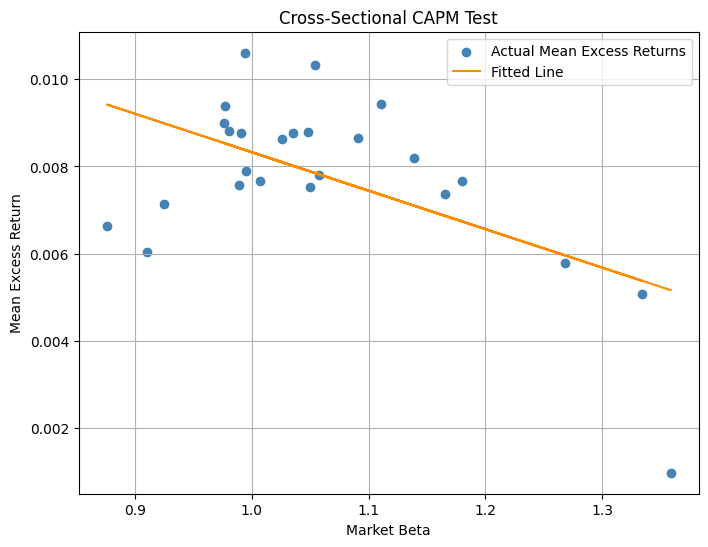

In [23]:

mean_excess_returns = equity_excess.mean()

betas = capm['Beta']

X = sm.add_constant(betas)
y = mean_excess_returns.loc[betas.index]  

cross_sec_model = sm.OLS(y, X).fit()

eta = cross_sec_model.params['const']         
lambda_mkt = cross_sec_model.params['Beta']   
r2 = cross_sec_model.rsquared

print("=== Cross-Sectional CAPM Test ===")
print(f"Intercept (η): {eta:.6f}")
print(f"Market Risk Premium (λ_mkt): {lambda_mkt:.6f}")
print(f"R-squared: {r2:.4f}")
print("\nRegression Summary:")
print(cross_sec_model.summary())

plt.figure(figsize=(8,6))
plt.scatter(betas, y, label="Actual Mean Excess Returns", color='steelblue')
plt.plot(betas, cross_sec_model.predict(X), color='darkorange', label='Fitted Line')
plt.xlabel("Market Beta")
plt.ylabel("Mean Excess Return")
plt.title("Cross-Sectional CAPM Test")
plt.legend()
plt.grid(True)
plt.show()


### Report
- **Intercept (η):** 0.017153
- **Market Risk Premium (λₘₖₜ):** -0.008826
- **R²:** 0.3132

If the CAPM were completely accurate, the model would perfectly explain the cross-section of expected returns.  
That would imply three things:
1. The intercept should be zero, meaning there would be no average excess returns unexplained by market exposure.  
2. The slope should equal the average market excess return, since the market factor is the only source of priced risk.  
3. The R² should be basically 1, indicating that all variation in mean returns across portfolios is captured entirely by differences in their betas.  

In reality, we almost never see that. A nonzero intercept or low R² suggests that the market factor alone doesn’t fully price assets, hinting at other systematic effects (like size or value)that DFA explicitly builds into its models.

### 4. Conclusion

Broadly speaking, do these results support DFA's belieef in size and value portfolios containing premia unrelated to the market premium?

The results mostly line up with DFA’s worldview, though not perfectly. The cross-sectional regression shows that the market factor alone doesn’t explain the full spread in average returns. the intercept is positive, and the slope on beta even turns negative. That pattern implies something beyond market risk is being priced. 

Consistent with DFA’s philosophy, value portfolios (high book to market) earn persistent excess returns not captured by CAPM. The size effect, however, appears weaker and less consistent across periods. In other words, the data reinforce DFA’s belief that markets are broadly efficient but still contain systematic risk premia (especially for value) that can be captured through disciplined, diversified exposure rather than active stock picking.
